In [1]:
#Loading two CSV files

library(readr)

laliga_Fantasy = read_csv("C:\\Users\\PRETTY MATHEW\\Downloads\\LaLigaFantasy.csv")
str(laliga_Fantasy)

New names:
• `` -> `...1`
Rows: 10003 Columns: 24
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (12): Season_ID, Season, League, Player_ID, Players, Clubs, Position, CS...
dbl (12): ...1, Points, Start, Goals, A, Yellow, Red, Sub, CO, Off, Pen.M, OG

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [10,003 × 24] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1          : num [1:10003] 1 2 3 4 5 6 7 8 9 10 ...
 $ Season_ID     : chr [1:10003] "22/23-LL" "22/23-LL" "22/23-LL" "22/23-LL" ...
 $ Season        : chr [1:10003] "2022/2023" "2022/2023" "2022/2023" "2022/2023" ...
 $ League        : chr [1:10003] "La Liga" "La Liga" "La Liga" "La Liga" ...
 $ Player_ID     : chr [1:10003] "22/23-Robert Lewandowski" "22/23-Antoine Griezmann" "22/23-Marc-Andre ter Stegen" "22/23-Borja Iglesias" ...
 $ Players       : chr [1:10003] "Robert Lewandowski" "Antoine Griezmann" "Marc-Andre ter Stegen" "Borja Iglesias" ...
 $ Points        : num [1:10003] 198 190 172 158 151 149 147 142 141 138 ...
 $ Clubs         : chr [1:10003] "BARC" NA "BARC" "BETI" ...
 $ Position      : chr [1:10003] "Forward" "Forward" "Goalkeeper" "Defender" ...
 $ Start         : num [1:10003] 33 31 38 29 33 30 24 34 35 28 ...
 $ Goals         : num [1:10003] 23 15 0 15 16 1 19 15 14 1 ...
 $ A             : num [

In [2]:
missing_count <- colSums(is.na(laliga_Fantasy))
print(missing_count) 

          ...1      Season_ID         Season         League      Player_ID 
             0              0              0              0              0 
       Players         Points          Clubs       Position          Start 
             0              0           2951              0              0 
         Goals              A             CS        CS.part         Yellow 
             0              0              0              0              0 
           Red            Sub             CO            Off         Pen.SV 
             0              0              0              0              0 
         Pen.M Goals.conceded    Conceded.1.             OG 
             0              0              0              0 


In [7]:
laliga_Fantasy_new <- na.omit(laliga_Fantasy)
head(laliga_Fantasy_new)

...1,Season_ID,Season,League,Player_ID,Players,Points,Clubs,Position,Start,⋯,Yellow,Red,Sub,CO,Off,Pen.SV,Pen.M,Goals.conceded,Conceded.1.,OG
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,22/23-LL,2022/2023,La Liga,22/23-Robert Lewandowski,Robert Lewandowski,198,BARC,Forward,33,⋯,3,0,1,1,5,-,1,-,-,0
3,22/23-LL,2022/2023,La Liga,22/23-Marc-Andre ter Stegen,Marc-Andre ter Stegen,172,BARC,Goalkeeper,38,⋯,0,0,0,0,2,0,0,20,8,0
4,22/23-LL,2022/2023,La Liga,22/23-Borja Iglesias,Borja Iglesias,158,BETI,Defender,29,⋯,2,1,6,6,22,-,1,33,11,0
5,22/23-LL,2022/2023,La Liga,22/23-Joselu,Joselu,151,RCDE,Forward,33,⋯,2,0,2,1,0,-,0,-,-,0
6,22/23-LL,2022/2023,La Liga,22/23-Alejandro Balde,Alejandro Balde,149,BARC,Defender,30,⋯,4,0,7,3,9,-,0,17,7,0
7,22/23-LL,2022/2023,La Liga,22/23-Karim Benzema,Karim Benzema,147,MADR,Forward,24,⋯,1,0,0,0,6,-,2,-,-,0


In [3]:
duplicate_rows <- duplicated(laliga_Fantasy) | duplicated(laliga_Fantasy, fromLast = TRUE)

# View the duplicate rows
laliga_Fantasy[duplicate_rows, ]


Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"


...1,Season_ID,Season,League,Player_ID,Players,Points,Clubs,Position,Start,⋯,Yellow,Red,Sub,CO,Off,Pen.SV,Pen.M,Goals.conceded,Conceded.1.,OG
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>


In [8]:
# Load the required library
library(dplyr)

# Group the data by Season and Clubs and calculate the sum of Points
aggregated_data <- laliga_Fantasy_new %>%
  group_by(Season, Clubs) %>%
  summarize(Total_Points = sum(Points))

# View the aggregated data
View(aggregated_data)


`summarise()` has grouped output by 'Season'. You can override using the `.groups` argument.


Season,Clubs,Total_Points
<chr>,<chr>,<dbl>
2007/2008,ATBI,1116
2007/2008,BARC,1392
2007/2008,BETI,1098
2007/2008,MADR,1477
2007/2008,MALL,1207
2007/2008,OSAS,1105
2007/2008,RASA,1283
2007/2008,RCDC,1274
2007/2008,RCDE,1079


In [9]:
library(dplyr)

# Arrange the data by year and points in descending order
df_sorted <- aggregated_data %>%
  arrange(Season, desc(Total_Points))

# Group the data by year and select the top four rows for each group
top_champions <- df_sorted %>%
  group_by(Season) %>%
  slice_head(n = 1)

# View the selected champions
top_champions


Season,Clubs,Total_Points
<chr>,<chr>,<dbl>
2007/2008,MADR,1477
2008/2009,BARC,1686
2009/2010,BARC,1888
2010/2011,BARC,1902
2011/2012,MADR,1991
2012/2013,BARC,1838
2013/2014,MADR,1847
2014/2015,BARC,2041
2015/2016,MADR,1925


In [48]:
library(dplyr)

# Filter the top_champions data frame for seasons from 2015 and onwards
top_champions_2015 <- top_champions %>%
  filter(as.numeric(substring(Season, 1, 4)) >= 2015 & as.numeric(substring(Season, 1, 4)) <= 2021)

# View the selected champions for seasons from 2015 and onwards
top_champions_2015

Season,Clubs,Total_Points
<chr>,<chr>,<dbl>
2015/2016,MADR,1925
2016/2017,BARC,1865
2017/2018,BARC,1850
2018/2019,BARC,1763
2019/2020,BARC,1759
2020/2021,BARC,1718
2021/2022,MADR,1711


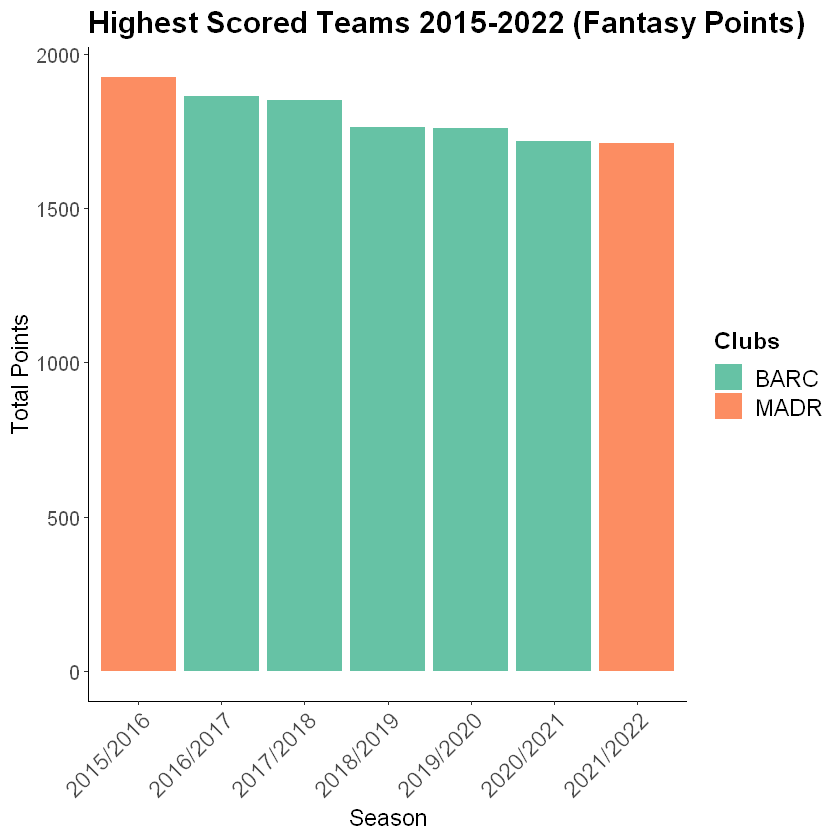

In [56]:
library(ggplot2)

gg <- ggplot(top_champions_2015, aes(x = Season, y = Total_Points, fill = Clubs)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Highest Scored Teams 2015-2022 (Fantasy Points)", x = "Season", y = "Total Points") +
  scale_fill_brewer(palette = "Set2") +# Choose a color palette
  theme_classic()
  gg + theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
            plot.title = element_text(size = 18, face = "bold"),
            axis.title.x = element_text(size = 14),  # Adjust the size of x-axis title
            axis.text.y = element_text(size = 12),  # Adjust the size of y-axis labels
            axis.title.y = element_text(size = 14),
            legend.text= element_text(size = 14),
            legend.title=element_text(size=14, face="bold")
            )


ggsave("my_plot.png", plot = gg, width = 6, height = 4, units = "in")


In [53]:
# Load the dplyr library
library(dplyr)

# Filter the dataset for MCFC and SPURS clubs and select specific columns
filtered_data <- laliga_Fantasy_new %>%
  filter(Clubs %in% c("BARC", "MADR") ,Season == "2021/2022") %>%
  select(Points, Position, Season, Players,Clubs)

# View the filtered dataset
View(filtered_data)

Points,Position,Season,Players,Clubs
<dbl>,<chr>,<chr>,<chr>,<chr>
229,Forward,2021/2022,Karim Benzema,MADR
174,Forward,2021/2022,Vinicius Junior,MADR
131,Goalkeeper,2021/2022,Thibaut Courtois,MADR
117,Defender,2021/2022,Eder Militao,MADR
109,Midfielder,2021/2022,Memphis Depay,BARC
106,Goalkeeper,2021/2022,Marc-Andre ter Stegen,BARC
103,Defender,2021/2022,Jordi Alba,BARC
98,Midfielder,2021/2022,Marco Asensio,MADR
89,Defender,2021/2022,Ronald Araujo,BARC


In [54]:
aggregated_data_position <- filtered_data %>%
  group_by(Position,Clubs,Season) %>%
  summarize(Total_Points = sum(Points))

# View the aggregated data
View(aggregated_data_position)

`summarise()` has grouped output by 'Position', 'Clubs'. You can override using the `.groups` argument.


Position,Clubs,Season,Total_Points
<chr>,<chr>,<chr>,<dbl>
Defender,BARC,2021/2022,517
Defender,MADR,2021/2022,425
Forward,BARC,2021/2022,334
Forward,MADR,2021/2022,529
Goalkeeper,BARC,2021/2022,111
Goalkeeper,MADR,2021/2022,140
Midfielder,BARC,2021/2022,597
Midfielder,MADR,2021/2022,617


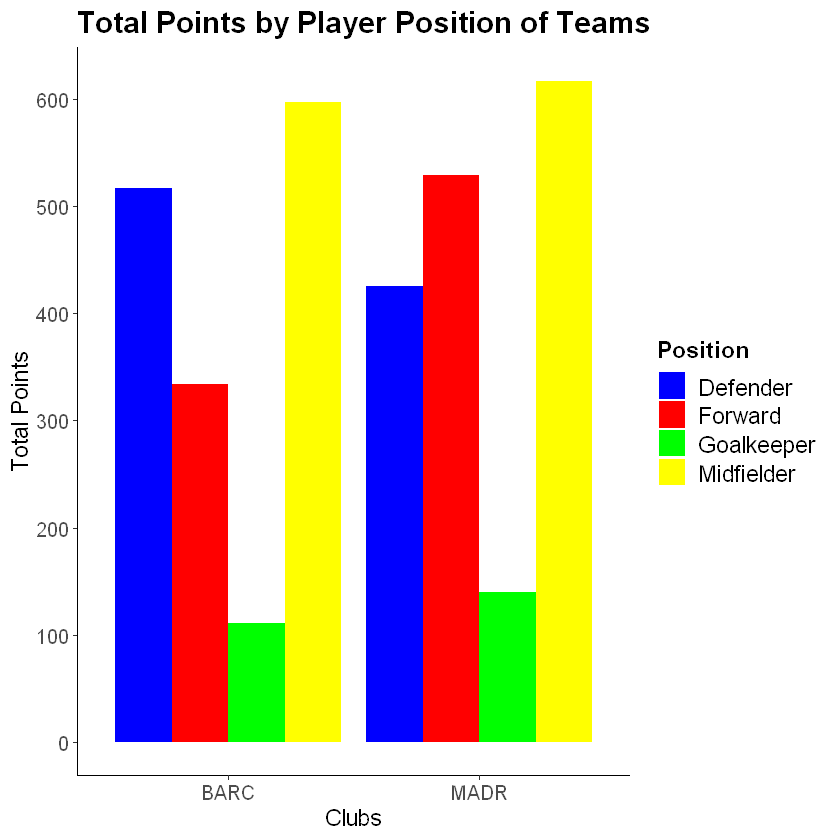

In [57]:
gg <- ggplot(aggregated_data_position, aes(x = Clubs, y = Total_Points, fill = Position)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Total Points by Player Position of Teams", x = "Clubs", y = "Total Points") +
  scale_fill_manual(values = c("Defender" = "Blue", "Forward" = "red","Goalkeeper"="green","Midfielder"="yellow")) +
  scale_y_continuous(breaks = seq(0, 1000, by = 100))+
# Specify colors
  theme_classic()

gg + theme(
  plot.title = element_text(size = 18, face = "bold"),  # Adjust title size and style
  axis.text.x = element_text(size = 12),  # Adjust the size of x-axis labels
  axis.title.x = element_text(size = 14),  # Adjust the size of x-axis title
  axis.text.y = element_text(size = 12),  # Adjust the size of y-axis labels
  axis.title.y = element_text(size = 14),
  legend.text= element_text(size = 14),
  legend.title=element_text(size=14, face="bold")
)
ggsave("my_plot.png", plot = gg, width = 6, height = 4, units = "in")
